<a href="https://colab.research.google.com/github/PratikshaShelke24/AI/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#grid serach

In [2]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load a sample dataset (Breast Cancer dataset)
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Initialize logistic regression model
logistic = LogisticRegression()


In [7]:
# Define hyperparameter grid (param_grid)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l1', 'l2'],         # Type of regularization
    'solver': ['liblinear']          # Solver to use (liblinear supports 'l1' and 'l2')
}

In [8]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

In [9]:
# Perform grid search on the training set
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [10]:
# Print the best hyperparameters found by grid search
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [11]:
# Evaluate on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [12]:
# Display classification report for the test set
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [13]:
# Visualizing Grid Search results
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

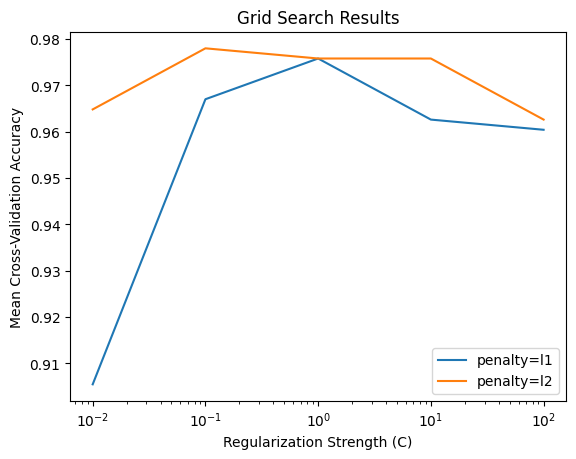

In [14]:
# Plot mean test score against 'C' parameter for both 'l1' and 'l2'
for penalty in param_grid['penalty']:
    subset = results[results['param_penalty'] == penalty]
    plt.plot(subset['param_C'], subset['mean_test_score'], label=f"penalty={penalty}")

plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xscale('log')
plt.legend()
plt.title('Grid Search Results')
plt.show()

